# Meteorological data from fluxtowers
The meteorological data from SILO was replaced by the fluxtower meteorological data for the years there is data. The VOM was run:


1) with parameters obtained by optimizing with just SILO-data, and meteorological data corrected with fluxtower-data

2) with parameters obtained by optimizing with meteorological data corrected with fluxtower-data

## Weatherdata


In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
weather_silo = np.genfromtxt("../../data/VOM_input/HowardSprings/dailyweather.prn", names=True)
time_silo = np.arange(datetime(int(weather_silo["Year"][0]),int(weather_silo["Month"][0]),int(weather_silo["Day"][0])), 
                  datetime(int(weather_silo["Year"][-1]),int(weather_silo["Month"][-1]),int(weather_silo["Day"][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)

weather_dingo = np.genfromtxt("../../work/additional_analyses/sens_weatherdata/1_dingo/input/dailyweather.prn", names=True)
time_dingo = np.arange(datetime(int(weather_dingo["Year"][0]),int(weather_dingo["Month"][0]),int(weather_dingo["Day"][0])), 
                  datetime(int(weather_dingo["Year"][-1]),int(weather_dingo["Month"][-1]),int(weather_dingo["Day"][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)


<Figure size 1152x576 with 0 Axes>

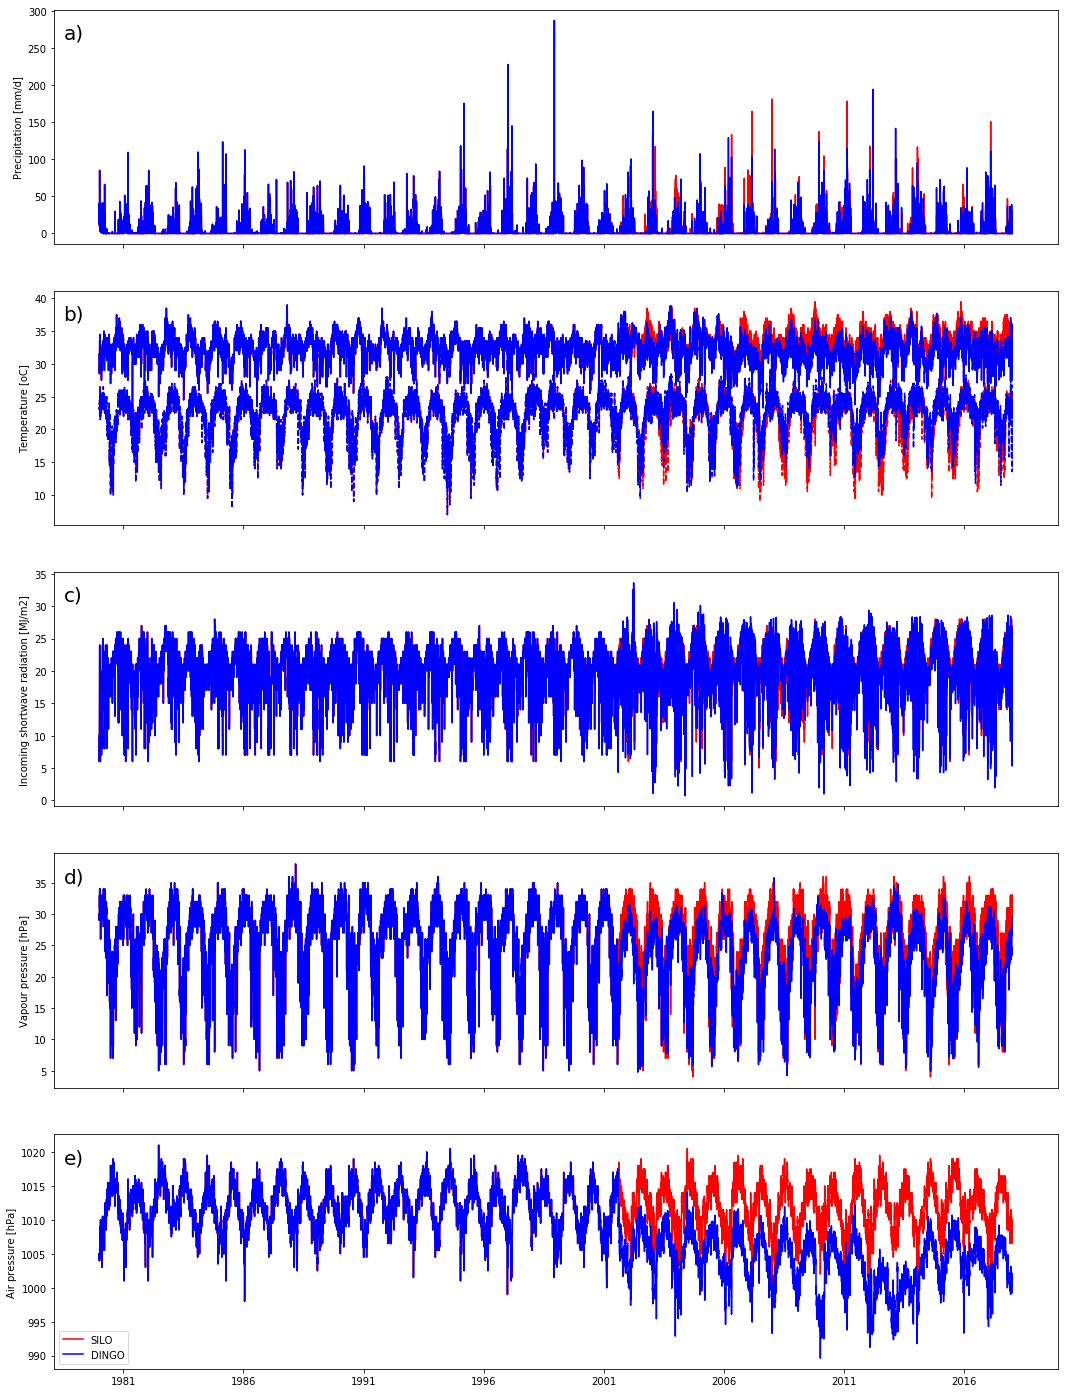

In [8]:
#rainfall

fig=plt.figure(figsize=(16,8), facecolor='w', edgecolor='k' )
fig, ax   = plt.subplots(nrows=5, ncols=1, figsize=(18, 25), sharex=True)   

ax[0].plot(time_silo, weather_silo["Rain"], color="red", label="SILO", zorder=1)           
ax[0].plot(time_dingo, weather_dingo["Rain"], color="blue", label="DINGO", zorder=1)   
ax[0].set_ylabel("Precipitation [mm/d]")
ax[0].text(0.01, 0.9, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)

#max. temperature
ax[1].plot(time_silo, weather_silo["TMax"], color="red", label="SILO Tmax", zorder=1)   
ax[1].plot(time_silo, weather_silo["TMin"],"--" ,color="red", label="SILO Tmin", zorder=1)           

ax[1].plot(time_dingo, weather_dingo["TMax"], color="blue", label="DINGO Tmax", zorder=1)   
ax[1].plot(time_dingo, weather_dingo["TMin"],"--" ,color="blue", label="DINGO Tmin", zorder=1)   
ax[1].set_ylabel("Temperature [oC]")
ax[1].text(0.01, 0.9, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)


ax[2].plot(time_silo, weather_silo["Radn"], color="red", label="SILO", zorder=1)           
ax[2].plot(time_dingo, weather_dingo["Radn"], color="blue", label="DINGO", zorder=1)   
ax[2].set_ylabel("Incoming shortwave radiation [MJ/m2]")
ax[2].text(0.01, 0.9, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)

ax[3].plot(time_silo, weather_silo["VP"], color="red", label="SILO", zorder=1)           
ax[3].plot(time_dingo, weather_dingo["VP"], color="blue", label="DINGO", zorder=1)   
ax[3].set_ylabel("Vapour pressure [hPa]")
ax[3].text(0.01, 0.9, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)

ax[4].plot(time_silo, weather_silo["Pres"], color="red", label="SILO", zorder=1)           
ax[4].plot(time_dingo, weather_dingo["Pres"], color="blue", label="DINGO", zorder=1)   
ax[4].set_ylabel("Air pressure [hPa]")
ax[4].text(0.01, 0.9, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)

plt.legend()
plt.show()




**Figure S8.1.** Timeseries for Howard Springs of a) precipitation, b) daily minimum and maximum temperatures, c) incoming shortwave radiation, d) vapour pressure and e) air pressure. Only air pressures show strong differences for the SILO and the DINGO data.

## Timeseries of evaporation

/home/remko/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


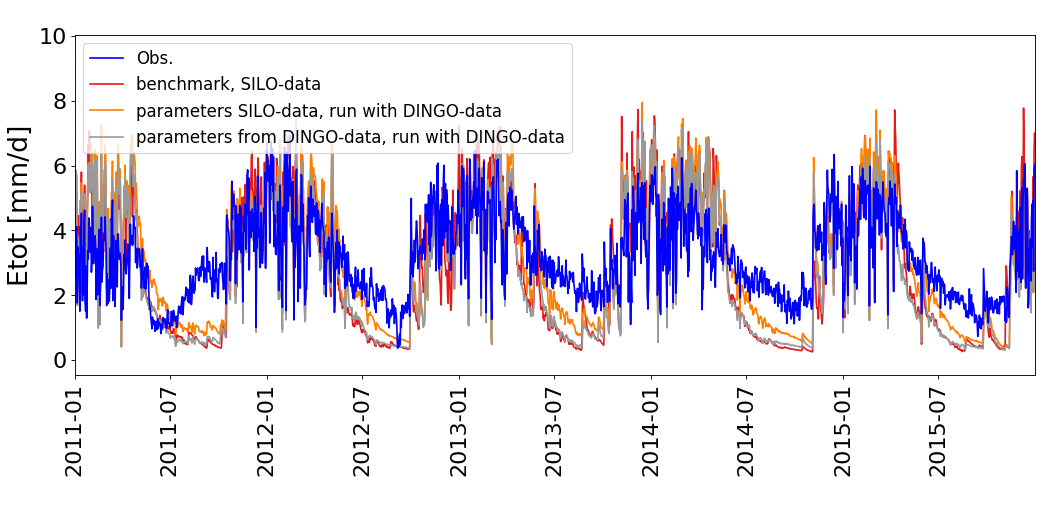

In [9]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/1_dingo/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/2_dingo_sce/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "benchmark, SILO-data" "parameters SILO-data, run with DINGO-data" "parameters from DINGO-data, run with DINGO-data" --legend True  \
--palette Set1


Evaporation at HowardSprings, with the benchmark data as the VOM model-runs with free-draining conditions and cpcff == 1.0. Replacing part of the input data with fluxtower-data leads to differences for both re-running the best SCE-result obtained with the original SILO-data, and for re-optimizing the VOM again, especially in the transition between the wet and dry period. 

## Timeseries of assimilation


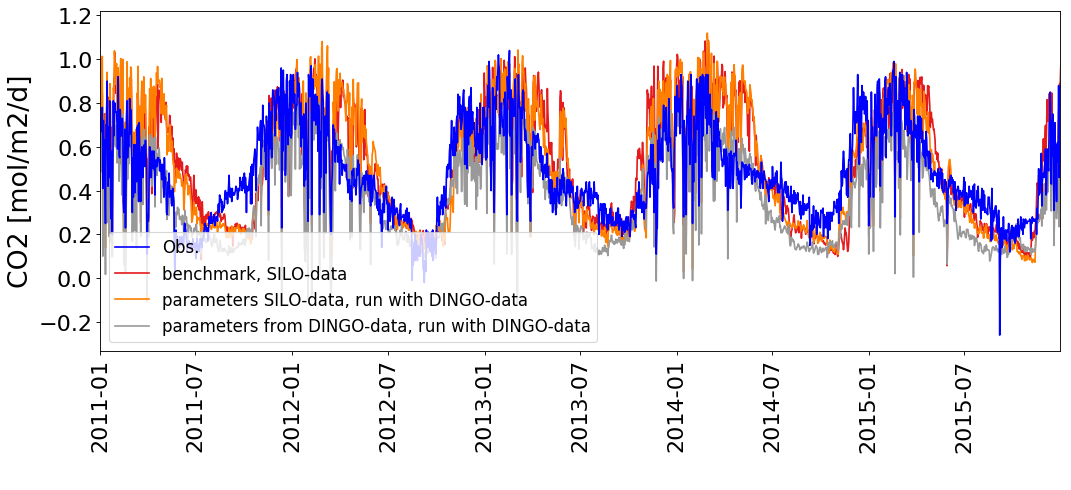

In [5]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/1_dingo/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/2_dingo_sce/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--labels "benchmark, SILO-data" "parameters SILO-data, run with DINGO-data" "parameters from DINGO-data, run with DINGO-data" --legend True  \
--palette Set1



Also here, changing part of the data for meteorological data from the fluxtowers leads to improvements.

## Relative errors


HowardSprings
add
AdelaideRiver
Litchfield
DalyUncleared
DryRiver
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_stats_best/ass_beststats.txt
SturtPlains


<Figure size 1280x400 with 0 Axes>

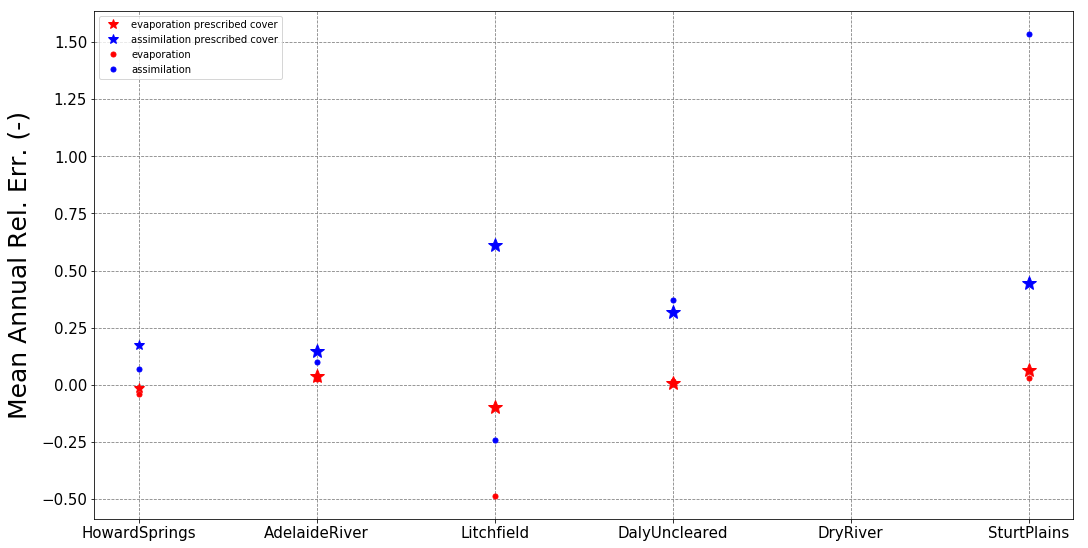

Missing files:  1


In [6]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), sharex=True, sharey=True)   


i = 0

skipped = 0
i_basin = 0
add_labels = 1

#loop over all sites
for site in study_sites:
  
    print(site)
    

    try:
        pc_ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/evap_beststats.txt") 

        pc_assbest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/ass_beststats.txt")              

        ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/evap_beststats.txt") #mm/d

        assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/ass_beststats.txt") #mm/d          
        
        if(add_labels  == 1):
            print("add")
            ax.plot(i_basin, pc_ebest_stats[1], '*r', markersize=10, label="evaporation prescribed cover" ) 
            ax.plot(i_basin, pc_assbest_stats[1], '*b', markersize=10, label="assimilation prescribed cover" ) 
            ax.plot(i_basin, ebest_stats[1], '.r', markersize=10, label="evaporation" ) 
            ax.plot(i_basin, assbest_stats[1], '.b', markersize=10, label="assimilation" )
            add_labels = 0            
        else:
            ax.plot(i_basin, pc_ebest_stats[1], '*r', markersize=15 ) 
            ax.plot(i_basin, pc_assbest_stats[1], '*b', markersize=15 ) 
            ax.plot(i_basin, ebest_stats[1], '.r', markersize=10, ) 
            ax.plot(i_basin, assbest_stats[1], '.b', markersize=10) 

    except IOError:
        skipped = skipped + 1 
        print("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/ass_beststats.txt")
       
        
        
    i_basin = i_basin + 1        

  
    ax.grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        
    plt.xticks(np.arange(0,6), study_sites )
    plt.legend()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (-)', size = 25, labelpad=40)


plt.tight_layout()
plt.show()

    
print("Missing files: ", + skipped)

The relative errors between the mean annual fluxes show similar results as the timeseries. In most cases, the differences are small, but adding prescribed vegetation cover increases the error. Only for SturtPlains, there is a large improvement for the assimilation (from the blue dot to the blue star). 